In [2]:
import illustris_python as il
import mistree as mist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.units as u
import astropy.constants as c
import pandas as pd
import networkx as nx
import seaborn as sns
import scienceplots

from sklearn.neighbors import radius_neighbors_graph
from scipy.spatial import Delaunay
from scipy.spatial.distance import euclidean, minkowski

import Utilities as ut

plt.style.use(['science','no-latex'])


In [4]:
potential = np.load(r'/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 1/MST/TNG300-1-Dark_snap_099.npz')

In [5]:
potential

'Divide each point by the mean density, then units are the same as the critical density = Rho/rho_critical = density_contrast - 1, density contrast < 0 is underdense, > 0 is overdense and 0 is critical'

'Divide each point by the mean density, then units are the same as the critical density = Rho/rho_critical = density_contrast - 1, density contrast < 0 is underdense, > 0 is overdense and 0 is critical'

In [6]:
mean_density = np.mean(potential['dens'])

In [7]:
np.shape(potential['dens'])

(512, 512, 512)

In [8]:
densities = np.array(potential['dens'])/mean_density

In [9]:
densities

array([[[8.70837590e-01, 4.10162615e-01, 7.31870866e-01, ...,
         9.14741332e-01, 8.98717412e-01, 1.37619068e+00],
        [1.19083312e+00, 1.00236013e-01, 1.05933779e-01, ...,
         2.63254520e-01, 5.49960451e-01, 2.81721732e+00],
        [1.83084876e+00, 7.57927956e-02, 5.02958747e-02, ...,
         1.18268243e-01, 4.22608620e-01, 4.08651589e+00],
        ...,
        [2.55771655e+01, 1.19521013e+01, 1.88224174e+00, ...,
         7.78413595e+01, 2.62224408e+01, 3.39345248e+01],
        [5.52966074e+00, 2.37042594e+00, 1.03802441e+00, ...,
         4.47852120e+01, 1.56777908e+01, 9.20903736e+00],
        [1.14657981e+00, 1.31109037e+00, 1.85164720e+00, ...,
         6.16531502e+00, 2.88244122e+00, 1.54284504e+00]],

       [[1.02465661e+00, 2.39370656e-01, 1.54671132e-01, ...,
         2.58890663e-01, 2.73403916e-01, 1.31235130e+00],
        [1.14553516e+00, 2.23602060e-01, 9.81900262e-02, ...,
         1.22618195e-01, 2.77742699e-01, 1.96747018e+00],
        [5.52676728e-01, 

In [21]:
gal_densities = densities[testcat.xpix, testcat.ypix, testcat.zpix]

In [22]:
len(gal_densities)

97233

In [23]:
gal_densities

array([9063.44368725, 7053.72901768, 1603.69205124, ...,   32.18389552,
         47.90810511,   11.70973083])

In [24]:
gal_densities=pd.DataFrame(gal_densities, columns=['Sim Density'])

In [25]:
print(testcat.xpix, testcat.ypix, testcat.zpix)

[109 113 111 ... 111 109 114] [121 129 122 ... 117 184 173] [368 365 369 ... 374 369 363]


In [26]:
np.shape(testcat.cweb)

(97233,)

In [27]:
tab2 = pd.read_csv('dak_tab2.csv', index_col=0)
gal_pos = pd.read_csv('gal_positions.csv', index_col=0)
tab2 = pd.concat([gal_pos, tab2, gal_densities], axis=1)
print(tab2)
# print(gal_pos)

                x           y          z     Degree  Mean E.L.  Min E.L.  \
0       64.539150   72.060295  217.88449   3.786575   0.252438  0.121074   
1       67.083374   76.542960  216.14484   3.439105   0.245650  0.158843   
2       65.678720   72.470800  218.29138   4.289986   0.428999  0.032403   
3       64.689680   75.198410  218.05590   5.261107   0.751587  0.044699   
4       65.400920   73.266860  218.28978   9.891149   0.760858  0.254148   
...           ...         ...        ...        ...        ...       ...   
97228   15.100064  175.660930  284.90670  81.350501   3.697750  0.803879   
97229  260.862520  159.709170  275.62158  74.863507   4.990900  0.789464   
97230   65.984116   69.660920  221.26585  40.762152   2.397774  1.058297   
97231   64.463700  109.076010  218.45459  51.334932   3.019702  1.092770   
97232   67.616700  102.283394  214.76118  48.661160   3.475797  1.631685   

        Max E.L.  Clustering  Density Inverse  Neigh Density Inverse  Target  \
0      

In [13]:
testcat = ut.cat(path=r'/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 1/Illustris/TNG300-1', snapno=99, masscut=1e10)

There are 97233 subhalos with stellar mass greater than 0.6774.
Mean Subhalo Separation: 2.26 Mpc
Number Density of Subhalos: 0.0036 Mpc^-3


In [14]:
testcat.cweb_classify(xyzplot=False)

In [28]:
# Create flag for galaxies that are near the edge of the box

# edgeflag = np.zeros(len(gal_densities))
tolerance = 10 # Mpc/h

# subvolume centres
# box goes from 0 to testcat.boxsize Mpc
boxwidth = testcat.boxsize.to(u.Mpc)/np.shape(potential['dens'])[0]

# box beginnings and endings in x, y and z as [beginning, end]
boxcoordsx = np.array([[i*boxwidth.to(u.Mpc).value, (i+1)*boxwidth.to(u.Mpc).value] for i in range(np.shape(potential['dens'])[0])]) 
boxcoordsy = np.array([[i*boxwidth.to(u.Mpc).value, (i+1)*boxwidth.to(u.Mpc).value] for i in range(np.shape(potential['dens'])[1])])
boxcoordsz = np.array([[i*boxwidth.to(u.Mpc).value, (i+1)*boxwidth.to(u.Mpc).value] for i in range(np.shape(potential['dens'])[2])])

boxcoords = np.array([boxcoordsx, boxcoordsy, boxcoordsz])

In [29]:
stars = (testcat.object['subhalos']['SubhaloMassType'][:,4]) #stellar mass of subhalos
mc = testcat.masscut*testcat.hub/1e10 #mass cut for subhalos
stars_indices = np.where(stars>=mc)[0] #indices of subhalos with stellar mass greater than masscut

# Get the spatial coordinates of the subhalos above the masscut
x = testcat.x[stars_indices].to(u.Mpc).value
y = testcat.y[stars_indices].to(u.Mpc).value
z = testcat.z[stars_indices].to(u.Mpc).value

In [30]:
# get indices of the boxcoords bins that subhalos (x,y,z) fall into

xbox = [np.where((x[i] >= boxcoords[0,:,0]) & (x[i] < boxcoords[0,:,1]))[0][0] for i in range(len(x))]
ybox = [np.where((y[i] >= boxcoords[0,:,0]) & (y[i] < boxcoords[0,:,1]))[0][0] for i in range(len(y))]
zbox = [np.where((z[i] >= boxcoords[0,:,0]) & (z[i] < boxcoords[0,:,1]))[0][0] for i in range(len(z))]


# Make dictionary of subhalo id and box index
gal_boxdict = {i: [xbox[i], ybox[i], zbox[i]] for i in range(len(stars_indices))} # these are essentially the box coordinates for each subhalo
gal_boxtab = pd.DataFrame.from_dict(gal_boxdict, orient='index', columns=['xbox', 'ybox', 'zbox'])

In [31]:
gal_boxtab

,xbox,ybox,zbox
0,109,121,368
1,113,129,365
2,111,122,369
3,109,127,368
4,110,123,369
...,...,...,...
97228,25,297,482
97229,441,270,466
97230,111,117,374
97231,109,184,369


In [32]:
gal_boxtab=pd.concat([gal_boxtab, tab2['Target']], axis=1)
gal_boxtab.index.name = 'Galaxy ID'


In [58]:
gal_boxtab # table of box indices for each galaxies and the corresponding cosmic web environment

,xbox,ybox,zbox,Target
Galaxy ID,,,,
0,109,121,368,3.0
1,113,129,365,3.0
2,111,122,369,3.0
3,109,127,368,3.0
4,110,123,369,3.0
...,...,...,...,...
97228,25,297,482,3.0
97229,441,270,466,2.0
97230,111,117,374,2.0


In [56]:
'''
Identify neighboring boxes: For each box, identify its neighboring boxes.
Check cosmic web classification: Compare the cosmic web classification of each box with its neighbors.
Flag galaxies: Create a flag array to mark galaxies that are in boxes next to other boxes with different cosmic web classifications.
'''

# Create a dictionary of neighboring boxes for each box
galbox_neigh = {gal_boxtab.index[i]: gal_boxtab.loc[gal_boxtab.index[i]][['xbox', 'ybox', 'zbox']].values + np.array([i, j, k]) for i in [-1, 0, 1] for j in [-1, 0, 1] for k in [-1, 0, 1] for num in range(12)}

In [59]:
neighs = np.array([np.array([i,j,k]) for i in range(-1,2) for j in range(-1,2) for k in range(-1,2) if i!=0 or j!=0 or k!=0])

neighbors=np.array([[gal_boxtab.loc[gal_boxtab.index[i]][['xbox', 'ybox', 'zbox']].values + neigh for neigh in neighs] for i in range(len(gal_boxtab))])

In [36]:
neighs

array([[-1, -1, -1],
       [-1, -1,  0],
       [-1, -1,  1],
       [-1,  0, -1],
       [-1,  0,  0],
       [-1,  0,  1],
       [-1,  1, -1],
       [-1,  1,  0],
       [-1,  1,  1],
       [ 0, -1, -1],
       [ 0, -1,  0],
       [ 0, -1,  1],
       [ 0,  0, -1],
       [ 0,  0,  1],
       [ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  1,  1],
       [ 1, -1, -1],
       [ 1, -1,  0],
       [ 1, -1,  1],
       [ 1,  0, -1],
       [ 1,  0,  0],
       [ 1,  0,  1],
       [ 1,  1, -1],
       [ 1,  1,  0],
       [ 1,  1,  1]])

In [60]:
galboxtab.loc[gal_boxtab.index[0]][['xbox', 'ybox', 'zbox']].values

NameError: name 'galboxtab' is not defined

In [40]:
# Define the boundaries of the cube
x_bound, y_bound, z_bound = np.shape(potential['dens'])[0] - 1, np.shape(potential['dens'])[1] - 1, np.shape(potential['dens'])[2] - 1
# Create function to get neighbours of a given box coordinate
def box_neigh(x, y, z, neighs):
    neighbors = []
    for dx, dy, dz in neighs:
        nx, ny, nz = x + dx, y + dy, z + dz
        if 0 <= nx <= x_bound and 0 <= ny <= y_bound and 0 <= nz <= z_bound:
            neighbors.append([nx, ny, nz])

    # find cosmic web classification of each neighbouring box
    # cweb_neighbours = [cwebdata[nx, ny, nz] for nx, ny, nz in neighbors]
    
    return neighbors

In [41]:
box_neigh(1, 1, 0, neighs)

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [0, 2, 0],
 [0, 2, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 2, 0],
 [1, 2, 1],
 [2, 0, 0],
 [2, 0, 1],
 [2, 1, 0],
 [2, 1, 1],
 [2, 2, 0],
 [2, 2, 1]]

In [42]:
testneighs = []

for x, y, z in gal_boxtab[['xbox', 'ybox', 'zbox']].values:
    testneighs.append(np.array(box_neigh(x, y, z, neighs)))


In [43]:
# find cosmic web classification for each box in the testneighs array
cweb_neighs = []

for i in range(len(testneighs)):
    cweb_neighs.append([])
    for j in range(len(testneighs[i])):
        x, y, z = testneighs[i][j]
        cweb_neighs[i].append(testcat.cwebdata[x, y, z])

In [44]:
cweb_neighs

[[3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [2.0,
  3.0,
  3.0,
  2.0,
  3.0,
  3.0,
  2.0,
  2.0,
  3.0,
  3.0,
  3.0,
  3.0,
 

In [61]:
set(cweb_neighs[18])

{2.0, 3.0}

In [62]:
# find indices of galaxies that have at least one neighbour with a different cosmic web classification
flagged = {index: cweb for index, cweb in enumerate(cweb_neighs) if len(set(cweb)) > 1 or any(gal_boxtab.loc[gal_boxtab.index[index]]['Target'] != list(set(cweb)))}

In [63]:
len(flagged[5])

26

In [64]:
# find proportion of neighbouring boxes that have a different cosmic web classification to the galaxy 
propflaggeddiff = {index: sum(1 for i in flagged[index] if i != gal_boxtab.loc[gal_boxtab.index[index]]['Target']) for index in flagged.keys()}
totalneighs = {index: len(flagged[index]) for index in flagged.keys()}
# print(sum(1 for i in flagged[5] if i != gal_boxtab.loc[gal_boxtab.index[5]]['Target']))

In [65]:
test=pd.DataFrame.from_dict(propflaggeddiff, orient='index', columns=['propflaggeddiff'])
test['totalneighs'] = totalneighs.values()
test

,propflaggeddiff,totalneighs
5,9,26
18,3,26
25,1,26
35,12,26
37,2,26
...,...,...
97215,7,26
97218,8,26
97222,14,26
97223,12,26


In [50]:
test.to_csv('flagged.csv') # save flagged galaxies to csv

In [51]:
pd.DataFrame.from_dict(propflaggeddiff, orient='index', columns=['Propflaggeddiff']).to_csv('propflaggeddiff.csv')

In [52]:
# find proportion of each cosmic web classification in the flagged galaxies
propflagged = {index: [flagged[index].count(i) for i in set(flagged[index])] for index in flagged}


In [53]:
propflagged

{5: [9, 17],
 18: [23, 3],
 25: [1, 25],
 35: [12, 14],
 37: [2, 24],
 39: [6, 20],
 52: [1, 25],
 71: [4, 22],
 101: [21, 5],
 115: [5, 21],
 131: [3, 23],
 145: [12, 14],
 148: [1, 25],
 187: [23, 3],
 189: [3, 23],
 194: [1, 25],
 218: [6, 20],
 230: [20, 6],
 273: [23, 3],
 329: [4, 22],
 340: [8, 18],
 347: [5, 21],
 352: [11, 15],
 403: [4, 22],
 426: [8, 18],
 429: [12, 14],
 449: [8, 18],
 451: [3, 23],
 531: [5, 21],
 554: [3, 23],
 555: [10, 16],
 576: [11, 15],
 600: [7, 19],
 607: [9, 17],
 659: [25, 1],
 684: [17, 9],
 685: [14, 12],
 686: [22, 4],
 696: [3, 23],
 698: [23, 3],
 713: [14, 12],
 726: [25, 1],
 760: [25, 1],
 763: [17, 9],
 770: [25, 1],
 774: [22, 4],
 787: [25, 1],
 797: [23, 3],
 807: [11, 15],
 811: [9, 17],
 822: [7, 19],
 834: [3, 23],
 851: [8, 18],
 857: [22, 4],
 859: [16, 10],
 1140: [1, 25],
 1173: [14, 12],
 1175: [7, 19],
 1178: [1, 25],
 1188: [17, 9],
 1191: [5, 21],
 1207: [1, 25],
 1212: [9, 17],
 1215: [19, 7],
 1219: [15, 11],
 1248: [3, 2

In [67]:
tab2

,x,y,z,Degree,Mean E.L.,Min E.L.,Max E.L.,Clustering,Density Inverse,Neigh Density Inverse,Target,Sim Density
0,64.539150,72.060295,217.88449,3.786575,0.252438,0.121074,0.610647,0.000323,0.005380,0.005683,3.0,9063.443687
1,67.083374,76.542960,216.14484,3.439105,0.245650,0.158843,0.353270,0.000354,0.004313,0.003538,3.0,7053.729018
2,65.678720,72.470800,218.29138,4.289986,0.428999,0.032403,0.740822,0.000867,0.028963,0.024373,3.0,1603.692051
3,64.689680,75.198410,218.05590,5.261107,0.751587,0.044699,1.320098,0.001769,0.326501,0.731133,3.0,382.765349
4,65.400920,73.266860,218.28978,9.891149,0.760858,0.254148,1.141795,0.001110,0.243991,0.194437,3.0,1462.753879
...,...,...,...,...,...,...,...,...,...,...,...,...
97228,15.100064,175.660930,284.90670,81.350501,3.697750,0.803879,11.299435,0.003283,314.348322,3.671566,3.0,152.847222
97229,260.862520,159.709170,275.62158,74.863507,4.990900,0.789464,18.656740,0.006422,2006.475509,1.184803,2.0,25.805767
97230,65.984116,69.660920,221.26585,40.762152,2.397774,1.058297,3.451464,0.002639,29.699499,15.539591,2.0,32.183896
97231,64.463700,109.076010,218.45459,51.334932,3.019702,1.092770,6.863998,0.003514,116.028167,12.358767,2.0,47.908105


In [71]:
tab3 = tab2.copy()
features = tab2.iloc[:,:-2]
features

,x,y,z,Degree,Mean E.L.,Min E.L.,Max E.L.,Clustering,Density Inverse,Neigh Density Inverse
0,64.539150,72.060295,217.88449,3.786575,0.252438,0.121074,0.610647,0.000323,0.005380,0.005683
1,67.083374,76.542960,216.14484,3.439105,0.245650,0.158843,0.353270,0.000354,0.004313,0.003538
2,65.678720,72.470800,218.29138,4.289986,0.428999,0.032403,0.740822,0.000867,0.028963,0.024373
3,64.689680,75.198410,218.05590,5.261107,0.751587,0.044699,1.320098,0.001769,0.326501,0.731133
4,65.400920,73.266860,218.28978,9.891149,0.760858,0.254148,1.141795,0.001110,0.243991,0.194437
...,...,...,...,...,...,...,...,...,...,...
97228,15.100064,175.660930,284.90670,81.350501,3.697750,0.803879,11.299435,0.003283,314.348322,3.671566
97229,260.862520,159.709170,275.62158,74.863507,4.990900,0.789464,18.656740,0.006422,2006.475509,1.184803
97230,65.984116,69.660920,221.26585,40.762152,2.397774,1.058297,3.451464,0.002639,29.699499,15.539591
97231,64.463700,109.076010,218.45459,51.334932,3.019702,1.092770,6.863998,0.003514,116.028167,12.358767


In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

scaler = StandardScaler()
scaler = PowerTransformer(method = 'box-cox')
tab3.iloc[:,:-2] = scaler.fit_transform(features)
print(tab3)

              x         y         z    Degree  Mean E.L.  Min E.L.  Max E.L.  \
0     -0.931859 -0.803153  0.728168 -2.014559  -2.209860 -1.335262 -2.392986   
1     -0.895641 -0.741685  0.711012 -2.059378  -2.218986 -1.183516 -2.626377   
2     -0.915581 -0.797473  0.732175 -1.954994  -2.009095 -1.978620 -2.299263   
3     -0.929704 -0.759995  0.729856 -1.853995  -1.740171 -1.834865 -1.977976   
4     -0.919541 -0.786488  0.732159 -1.510958  -1.733531 -0.903389 -2.064904   
...         ...       ...       ...       ...        ...       ...       ...   
97228 -1.786507  0.415464  1.364818  0.053082  -0.500748 -0.112606 -0.008822   
97229  1.218607  0.247741  1.279171 -0.023423  -0.155902 -0.126290  0.707216   
97230 -0.911234 -0.836566  0.761411 -0.542188  -0.926087  0.100690 -1.275551   
97231 -0.932940 -0.325908  0.733782 -0.353575  -0.709590  0.126222 -0.605979   
97232 -0.888106 -0.408936  0.697341 -0.398185  -0.566521  0.457799 -0.565096   

       Clustering  Density Inverse  Nei

In [93]:
from sklearn.feature_selection import mutual_info_classif

X = tab3.iloc[:,3:-2]
y = tab3['Target']

In [94]:
y=[int(x) for x in tab3['Target'].to_numpy()]

In [95]:
X, y

(         Degree  Mean E.L.  Min E.L.  Max E.L.  Clustering  Density Inverse  \
 0     -2.014559  -2.209860 -1.335262 -2.392986   -2.295939        -2.042591   
 1     -2.059378  -2.218986 -1.183516 -2.626377   -2.272979        -2.058843   
 2     -1.954994  -2.009095 -1.978620 -2.299263   -1.962275        -1.903202   
 3     -1.853995  -1.740171 -1.834865 -1.977976   -1.559856        -1.644824   
 4     -1.510958  -1.733531 -0.903389 -2.064904   -1.842394        -1.680096   
 ...         ...        ...       ...       ...         ...              ...   
 97228  0.053082  -0.500748 -0.112606 -0.008822   -1.035789        -0.317239   
 97229 -0.023423  -0.155902 -0.126290  0.707216   -0.190483         0.277348   
 97230 -0.542188  -0.926087  0.100690 -1.275551   -1.244007        -0.902818   
 97231 -0.353575  -0.709590  0.126222 -0.605979   -0.965002        -0.585354   
 97232 -0.398185  -0.566521  0.457799 -0.565096   -0.720098        -0.485871   
 
        Neigh Density Inverse  
 0    

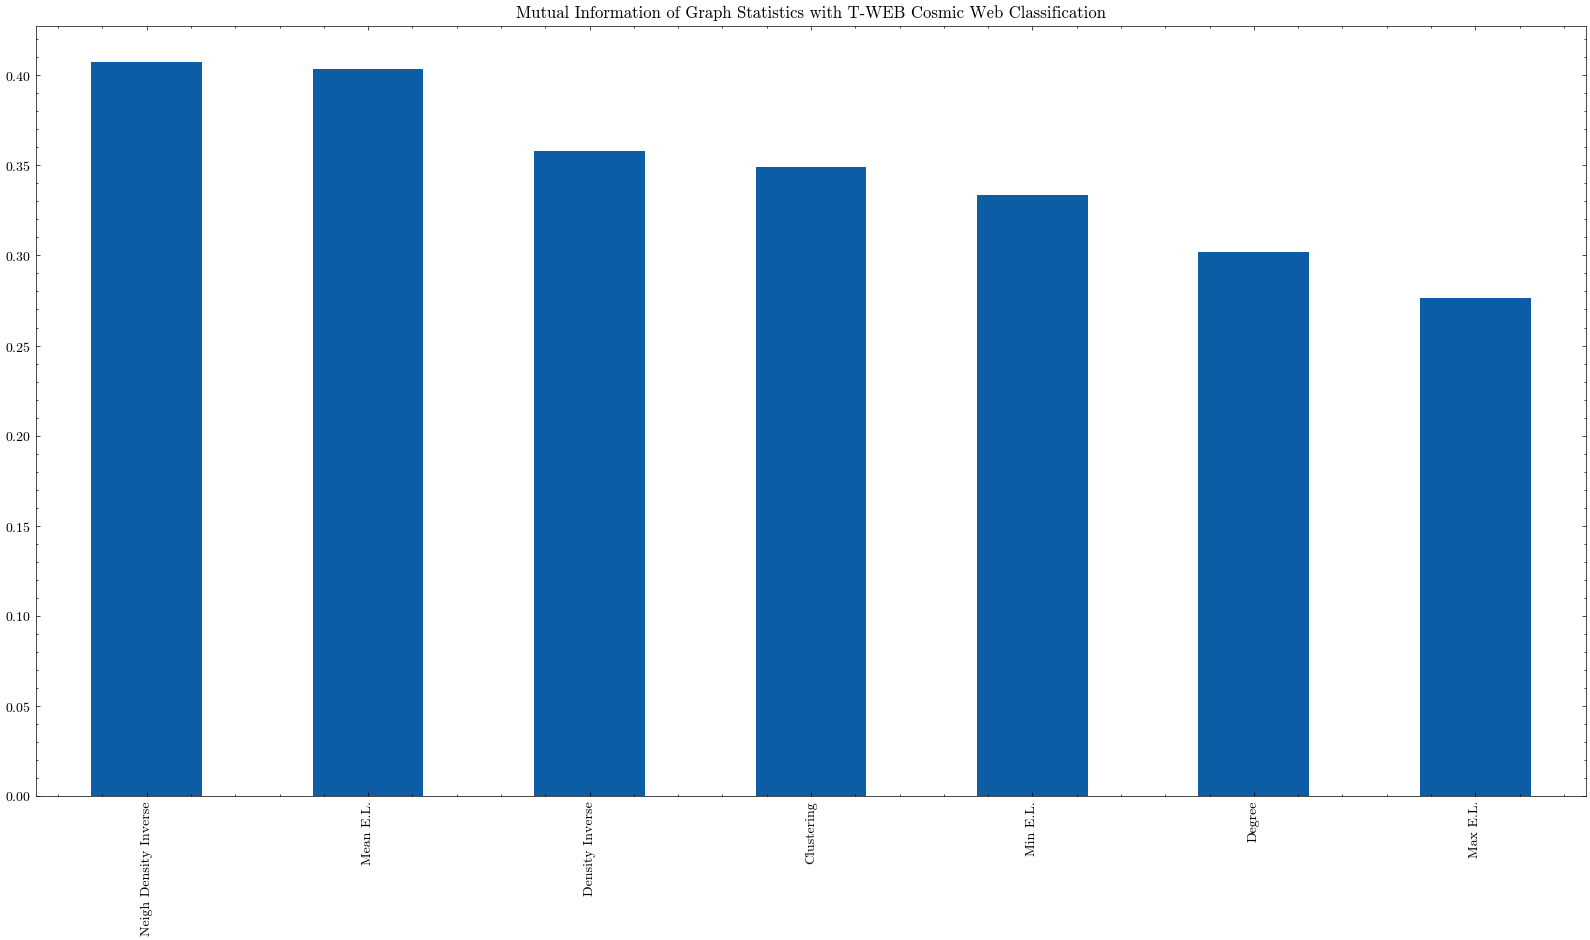

In [97]:
mi=pd.Series(mutual_info_classif(X, y))
mi.index = tab3.columns[3:-2]
mi.sort_values(ascending=False).plot.bar(figsize=(20, 10))
mi.ylabel = 'Mutual Information'
plt.title('Mutual Information of Graph Statistics with T-WEB Cosmic Web Classification')
plt.show()

[-8.41327161] [2.80601968]
[-4.21808216] [2.81878235]
[-1.31791345] [2.61975108]


(-9.0, 3.0)

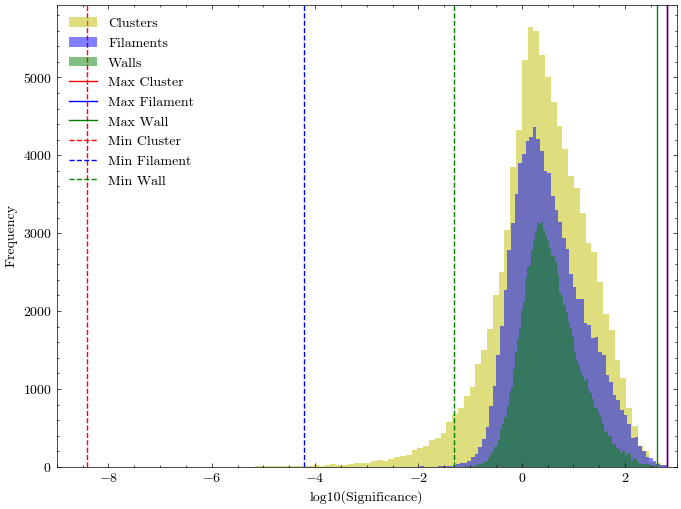

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(hist_Sc, bins=100, label='Clusters', alpha=0.5, color='y')
ax.hist(hist_Sf, bins=100, label='Filaments', alpha=0.5, color='blue')
ax.hist(hist_Sw, bins=100, label='Walls', alpha=0.5, color='green')
ax.axvline(max(hist_Sc), color='r', label='Max Cluster')
ax.axvline(max(hist_Sf), color='b', label='Max Filament')
ax.axvline(max(hist_Sw), color='g', label='Max Wall')
ax.axvline(min(hist_Sc), color='r', linestyle='--', label='Min Cluster')
ax.axvline(min(hist_Sf), color='b', linestyle='--', label='Min Filament')
ax.axvline(min(hist_Sw), color='g', linestyle='--', label='Min Wall')
ax.legend()
ax.set_xlabel('log10(Significance)')
ax.set_ylabel('Frequency')
ax.set_xlim(-9, 3)

In [36]:
from sklearn.preprocessing import minmax_scale

hist_Sc=minmax_scale(hist_Sc)
hist_Sf=minmax_scale(hist_Sf)
hist_Sw=minmax_scale(hist_Sw)

Text(0, 0.5, 'Frequency')

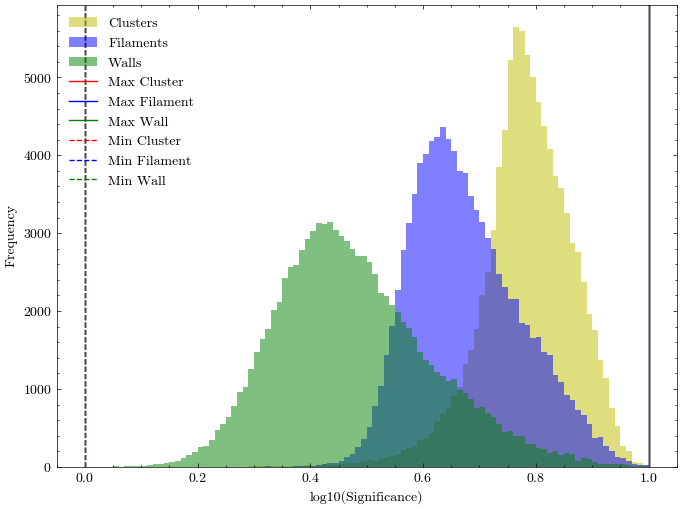

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(hist_Sc, bins=100, label='Clusters', alpha=0.5, color='y')
ax.hist(hist_Sf, bins=100, label='Filaments', alpha=0.5, color='blue')
ax.hist(hist_Sw, bins=100, label='Walls', alpha=0.5, color='green')
ax.axvline(max(hist_Sc), color='r', label='Max Cluster')
ax.axvline(max(hist_Sf), color='b', label='Max Filament')
ax.axvline(max(hist_Sw), color='g', label='Max Wall')
ax.axvline(min(hist_Sc), color='r', linestyle='--', label='Min Cluster')
ax.axvline(min(hist_Sf), color='b', linestyle='--', label='Min Filament')
ax.axvline(min(hist_Sw), color='g', linestyle='--', label='Min Wall')
ax.legend()
ax.set_xlabel('log10(Significance)')
ax.set_ylabel('Frequency')
